# Data Visualization with Modern Data Science

> Data Visualization with Python

Yao-Jen Kuo <yaojenkuo@ntu.edu.tw> from [DATAINPOINT](https://www.datainpoint.com/)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px

## Visualization Toolkits in Python

## (Recap) The definition of modern data science

> Modern data science is a huge field, it involves applications and tools like importing, tidying, transformation, visualization, modeling, and communication. Surrounding all these is programming.

![Imgur](https://i.imgur.com/din6Ig6.png)

Source: [R for Data Science](https://r4ds.had.co.nz/)

## A qualified visualization tool

- is able to wrangle data.
- is able to map data to "Aesthetics".
- is able to communicate result with audience.
- has a large user community.

## Exploring questions in [2022 Kaggle ML & DS Survey](https://www.kaggle.com/c/kaggle-survey-2022)

Q15: Do you use any of the following data visualization libraries on a regular basis? (Select all that apply)

In [2]:
from ks2022 import KaggleSurvey2022

csv_file = "https://raw.githubusercontent.com/datainpoint/classroom-data-viz-with-modern-ds-2023/main/data/kaggle_survey_2022_responses.csv"
ks = KaggleSurvey2022(csv_file)

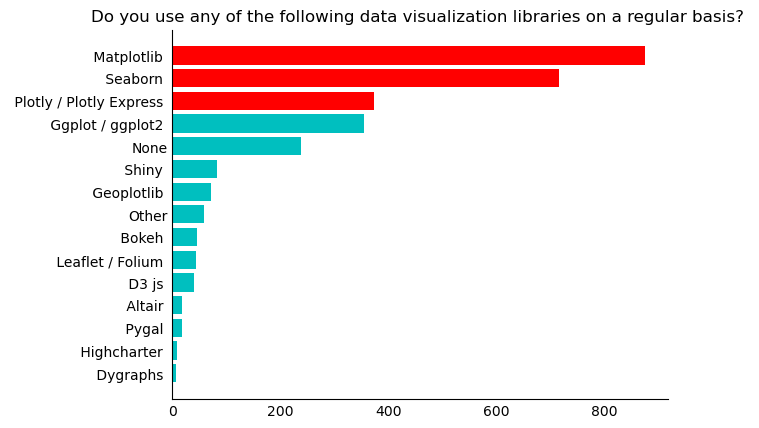

In [3]:
ks.plot_survey_summary(question_index="Q15", n=3)

## [StackOverflow Trends](https://insights.stackoverflow.com/trends) on Python's visualization toolkits

<https://insights.stackoverflow.com/trends?tags=matplotlib%2Cseaborn%2Cplotly%2Cbokeh>

## Visualization Toolkits of Python

- "Wrangle"：[Pandas](https://pandas.pydata.org/docs/index.html)
- Visualize and communicate：
    - Static：[Matplotlib](https://matplotlib.org/)、[Seaborn](https://seaborn.pydata.org/)
    - Geovisualization：[Folium](https://python-visualization.github.io/folium/)
    - Interactive：[Plotly](https://plotly.com/)

## About Matplotlib

## What is `matplotlib`?

> Matplotlib, short for matlab plotting library is a comprehensive library for creating static, animated, and interactive visualizations in Python.

Source: <https://matplotlib.org/>

## Import Matplotlib with `import` command

Matplotlib is officially aliased as `mpl`.

In [4]:
import matplotlib as mpl

## If Matplotlib is not installed, we will encounter a `ModuleNotFoundError`

```
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
ModuleNotFoundError: No module named 'matplotlib'
```

## Use `pip install` at Terminal to install matplotlib

```bash
pip install matplotlib
```

## Check version and its installation file path

- `__version__` attribute
- `__file__` attribute

In [5]:
print(mpl.__version__)
print(mpl.__file__)

3.7.1
/Users/kuoyaojen/opt/miniconda3/lib/python3.9/site-packages/matplotlib/__init__.py


## We will use `matplotlib.pyplot` through this chapter, which is a plotting module in matplotlib, officially aliased as `plt`

In [6]:
import matplotlib.pyplot as plt

## Two ways to plot

## The most challenging part for matplotlib newbies is its various plotting syntaxes

## There are 2 plotting syntaxes to adapt

- Matlab style.
- Object-oriented style.

## Plotting with matlab style: stateful interface

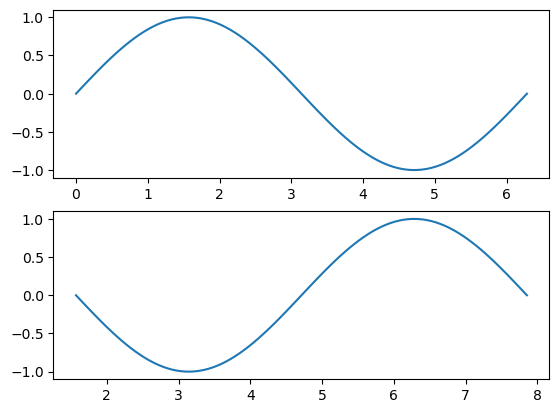

In [7]:
x1 = np.linspace(0, np.pi*2, 100)
x2 = np.linspace(np.pi * 0.5, np.pi*2.5, 100)
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(x1, np.sin(x1))
plt.subplot(2, 1, 2)
plt.plot(x2, np.cos(x2))
plt.show()

## Plotting with object-oriented style: object method interface

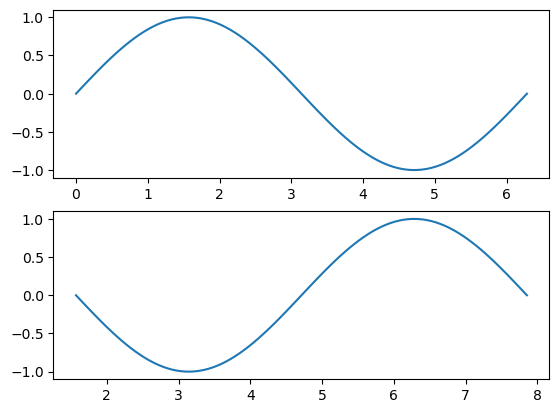

In [8]:
fig, axes = plt.subplots(2, 1)
axes[0].plot(x1, np.sin(x1))
axes[1].plot(x2, np.cos(x2))
plt.show()

## We will adapt the object-oriented style.

## The general steps

## The general steps to create plots are:

1. Creating arrays.
2. Generating figure and axes objects(respectively or simultaneously).
3. Calling various methods of axes object to generate main plot.
4. Calling various methods of axes object to add elements.
5. Show or save plots.

## Creating arrays

In [9]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

## Generating figure and axes objects respectively

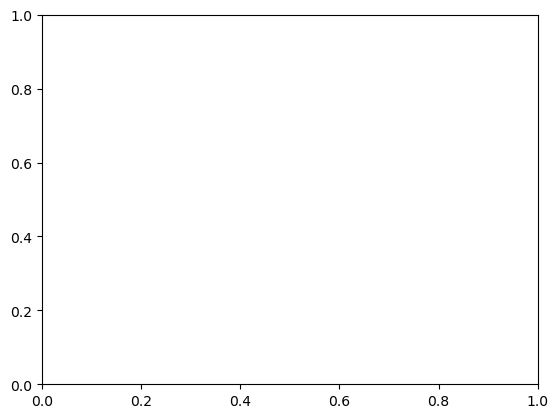

In [10]:
fig = plt.figure()
ax = plt.axes()

## Generating figure and axes objects simultaneously

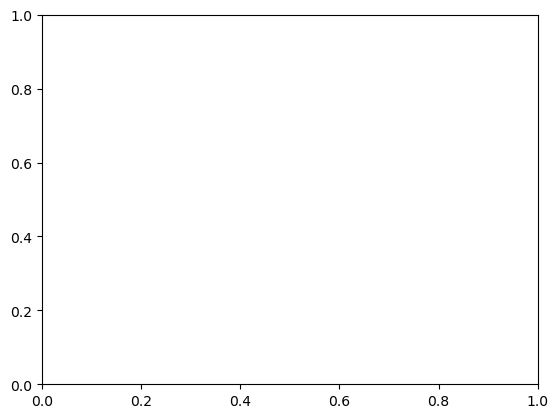

In [11]:
fig, ax = plt.subplots()

## Calling various methods of axes object to generate main plot

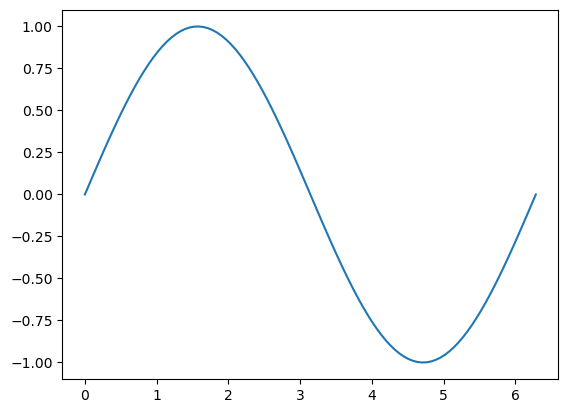

In [12]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x, y)

## Calling various methods of axes object to add elements

Text(0.5, 0, 'x')

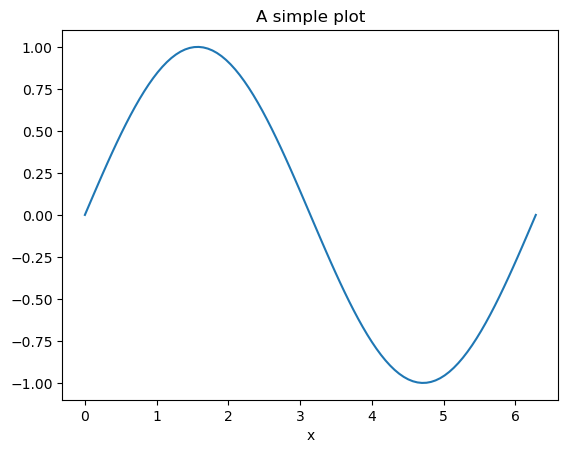

In [13]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x, y)
ax.set_title('A simple plot')
ax.set_xlabel('x')

## Show plots

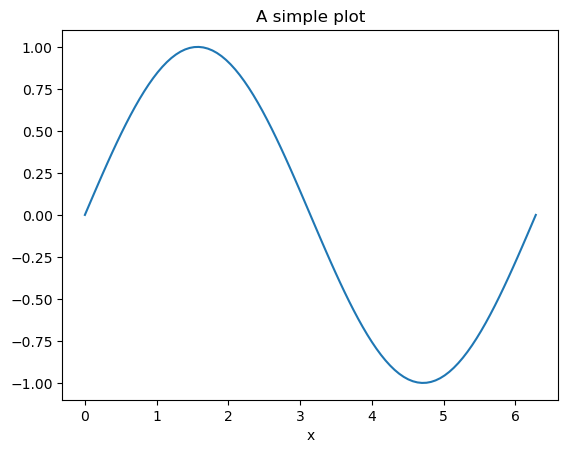

In [14]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x, y)
ax.set_title('A simple plot')
ax.set_xlabel('x')
plt.show()

## Save plots

Various format is supported.

In [15]:
fig = plt.figure()
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format',
 'webp': 'WebP Image Format'}

<Figure size 640x480 with 0 Axes>

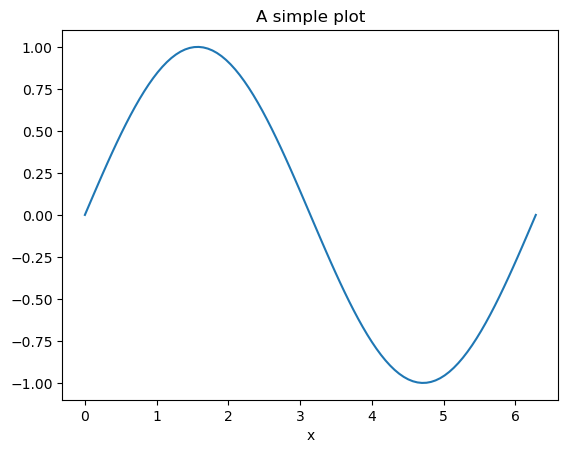

In [16]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x, y)
ax.set_title('A simple plot')
ax.set_xlabel('x')
fig.savefig('a_simple_plot.png')

## Different methods for different plot types

- `scatter()` for scatter plots.
- `hist()` for histograms.
- `plot()` for lines.
- `bar()` for bar plots.
- `imshow()` for showing images in `ndarray` format.
- ...etc.

In [17]:
csv_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/02-28-2023.csv"
daily_report = pd.read_csv(csv_url)

## `scatter` for scatter plots

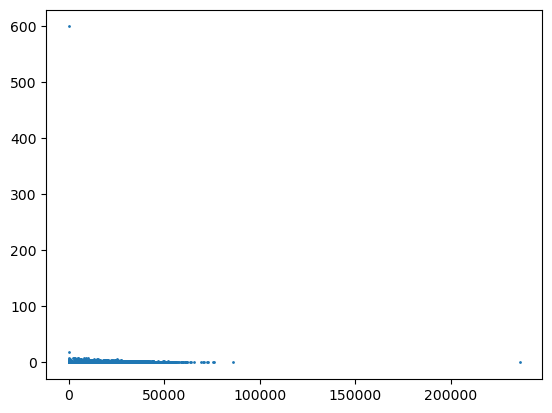

In [18]:
x = daily_report["Incident_Rate"].values
y = daily_report["Case_Fatality_Ratio"].values
fig = plt.figure()
ax = plt.axes()
ax.scatter(x, y, s=1)
plt.show()

## `hist` for histograms

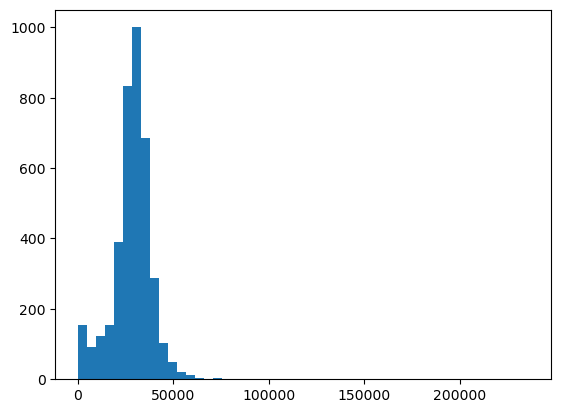

In [19]:
x = daily_report["Incident_Rate"].values # cases per 100,000 persons
fig = plt.figure()
ax = plt.axes()
ax.hist(x, bins=50)
plt.show()

In [20]:
def get_confirmed_time_series():
    request_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
    time_series = pd.read_csv(request_url)
    id_cols = time_series.columns[:4]
    time_series_long = pd.melt(time_series, id_vars=id_cols, var_name='Date', value_name='Confirmed')
    date = pd.to_datetime(time_series_long['Date'])
    time_series_long = time_series_long.drop('Date', axis=1)
    time_series_long.insert(4, 'Date', date)
    groupby_series = time_series_long.groupby(['Country/Region', 'Date'])['Confirmed'].sum()
    out = pd.DataFrame(groupby_series).reset_index()
    return out

confirmed_time_series = get_confirmed_time_series()

## `plot` for lines

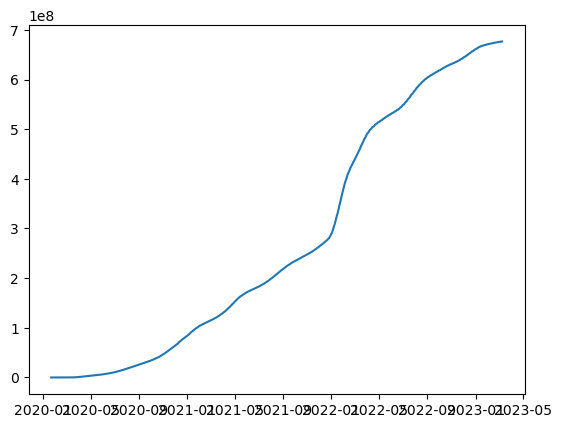

In [21]:
global_ts = confirmed_time_series.groupby("Date")["Confirmed"].sum()
x = global_ts.index
y = global_ts.values
fig = plt.figure()
ax = plt.axes()
ax.plot(x, y)
plt.show()

## `bar` for vertical bar plots

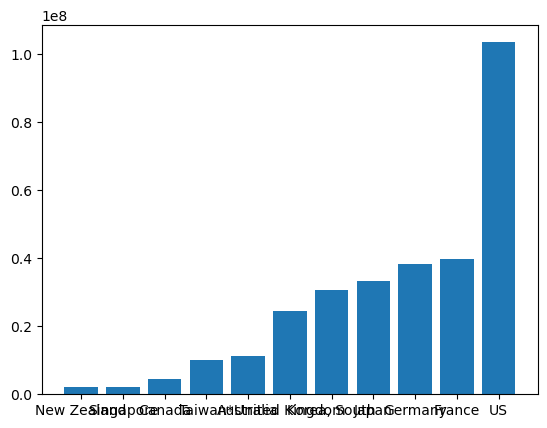

In [22]:
country_list = ["US", "United Kingdom", "France", "Germany", "Canada", "Korea, South", "Japan", "Singapore", "Australia", "Taiwan*", "New Zealand"]
confirmed_by_country = daily_report.groupby('Country_Region')['Confirmed'].sum().sort_values()
filtered_confirmed_by_country = confirmed_by_country[confirmed_by_country.index.isin(country_list)]
fig = plt.figure()
ax = plt.axes()
x = filtered_confirmed_by_country.index
height = filtered_confirmed_by_country.values
ax.bar(x, height)
plt.show()

## `barh` for horizontal bar plots

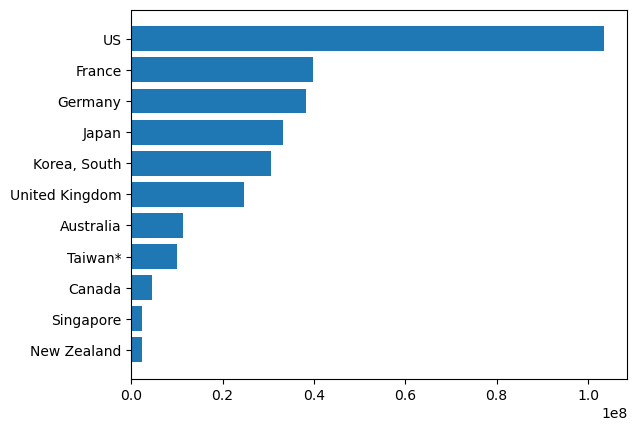

In [23]:
fig = plt.figure()
ax = plt.axes()
y = filtered_confirmed_by_country.index
width = filtered_confirmed_by_country.values
ax.barh(y, width)
plt.show()

## Techniques for adding elements

## How to add title and axis labels

- `set_title` to add title.
- `set_xlabel` to add x-axis label.
- `set_ylabel` to add y-axis label.

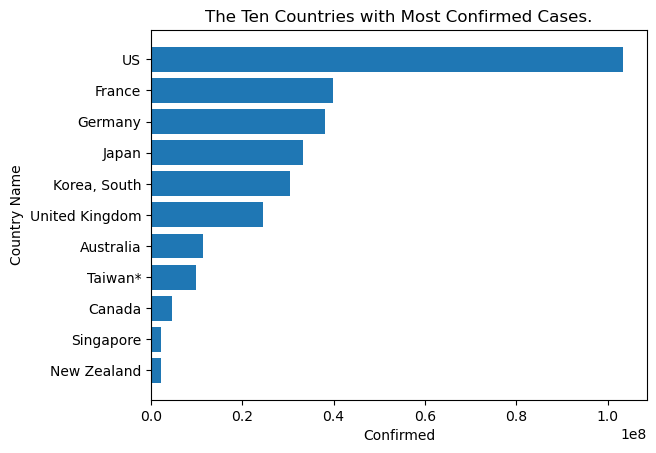

In [24]:
fig = plt.figure()
ax = plt.axes()
y = filtered_confirmed_by_country.index
width = filtered_confirmed_by_country.values
ax.barh(y, width)
ax.set_title('The Ten Countries with Most Confirmed Cases.')
ax.set_xlabel('Confirmed')
ax.set_ylabel('Country Name')
plt.show()

## How to adjust axis ticks

- `set_xticks` to adjust x-axis ticks.
- `set_yticks` to adjust y-axis ticks.

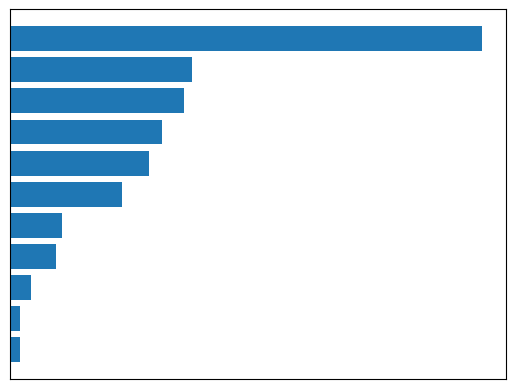

In [25]:
fig = plt.figure()
ax = plt.axes()
y = filtered_confirmed_by_country.index
width = filtered_confirmed_by_country.values
ax.barh(y, width)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

## How to adjust axis tick labels

- `set_xticklabels` to adjust x-axis tick labels.
- `set_yticklabels` to adjust y-axis tick labels.

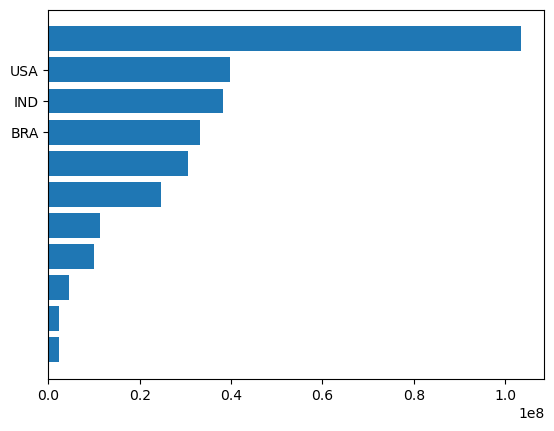

In [26]:
fig = plt.figure()
ax = plt.axes()
y = filtered_confirmed_by_country.index
width = filtered_confirmed_by_country.values
ax.barh(y, width)
ax.set_yticks([7, 8, 9])
ax.set_yticklabels(["BRA", "IND", "USA"])
plt.show()

## How to adjust axis limits

- `set_xlim` to adjust the upper/lower limits of x-axis.
- `set_ylim` to adjust the upper/lower limits of y-axis.

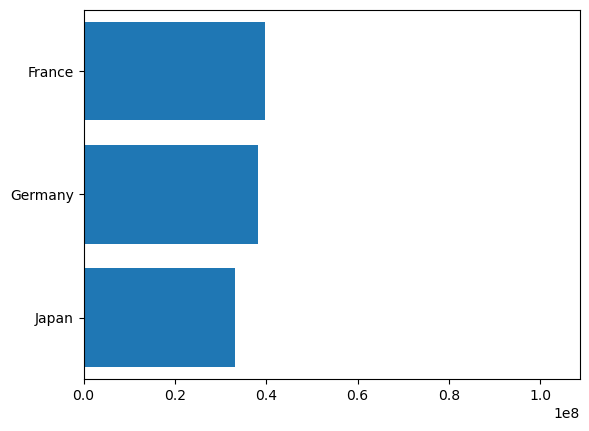

In [27]:
fig = plt.figure()
ax = plt.axes()
y = filtered_confirmed_by_country.index
width = filtered_confirmed_by_country.values
ax.barh(y, width)
ax.set_ylim(6.5, 9.5)
plt.show()

## How to add texts

`text(x, y, 'Some Strings')` to add `'Some Strings'` at (x, y).

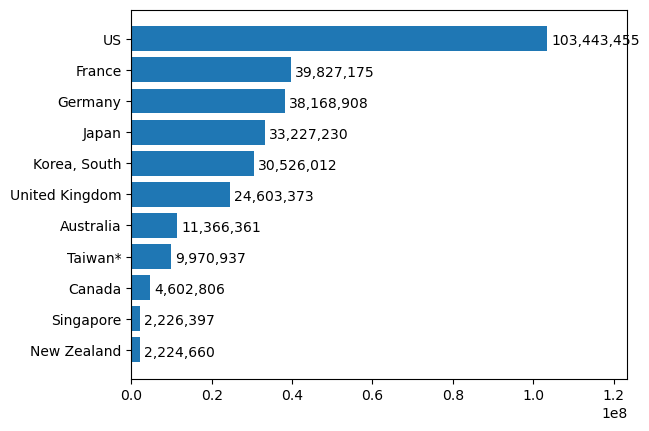

In [28]:
fig = plt.figure()
ax = plt.axes()
ax.barh(filtered_confirmed_by_country.index, filtered_confirmed_by_country.values)
for i in range(filtered_confirmed_by_country.size):
    v = filtered_confirmed_by_country.values[i]
    ax.text(v + 1000000, i - 0.2, "{:,}".format(v))
ax.set_xlim(0, filtered_confirmed_by_country.max() + 2e7)
plt.show()

## How to add legends

`legend()` and `label` parameter to add a legend to indicate categories.

In [29]:
def plot_lines_with_legends(country_names, ts_df):
    fig = plt.figure()
    ax = plt.axes()
    for country in country_names:
        country_data = ts_df[ts_df['Country/Region'].str.contains(country)]
        x = country_data['Date']
        y = country_data['Confirmed']
        ax.plot(x, y, label=country)
    ax.set_xlabel('Date')
    ax.set_title('Cumulative COVID-19 confirmed cases')
    ax.legend()
    plt.show()

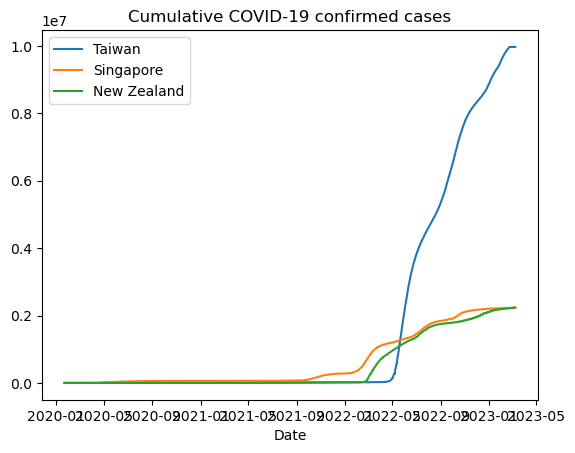

In [30]:
plot_lines_with_legends(['Taiwan', 'Singapore', 'New Zealand'], confirmed_time_series)

## How to solve the problem that matplotlib supporting only English and European fonts?

/Users/kuoyaojen/opt/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32047 (\N{CJK UNIFIED IDEOGRAPH-7D2F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kuoyaojen/opt/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 35336 (\N{CJK UNIFIED IDEOGRAPH-8A08}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kuoyaojen/opt/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 30906 (\N{CJK UNIFIED IDEOGRAPH-78BA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kuoyaojen/opt/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 35386 (\N{CJK UNIFIED IDEOGRAPH-8A3A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kuoyaojen/opt/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20154 (\N{CJK

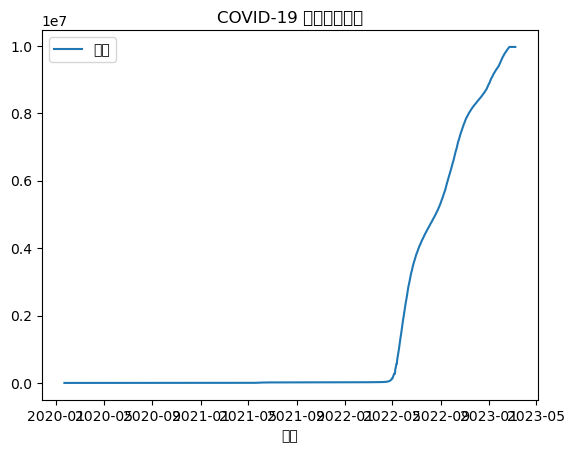

In [31]:
fig = plt.figure()
ax = plt.axes()
tw = confirmed_time_series[confirmed_time_series['Country/Region'].str.contains('Taiwan')]
ax.plot(tw['Date'].values, tw['Confirmed'].values, label='台灣')
ax.set_title('COVID-19 累計確診人數')
ax.set_xlabel('日期')
ax.legend()
plt.show()

## Calling `FontProperties` function from `matplotlib.font_manager`

In [32]:
from matplotlib.font_manager import FontProperties

my_font = FontProperties(fname="/System/Library/Fonts/STHeiti Light.ttc") # Specify a font supporting Chinese

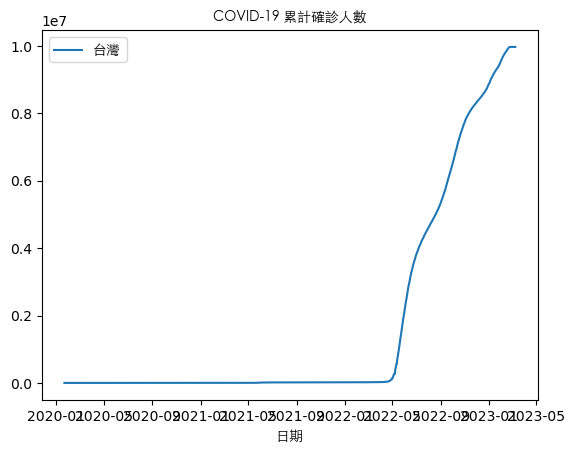

In [33]:
fig = plt.figure()
ax = plt.axes()
tw = confirmed_time_series[confirmed_time_series['Country/Region'].str.contains('Taiwan')]
ax.plot(tw['Date'].values, tw['Confirmed'].values, label='台灣')
ax.set_title('COVID-19 累計確診人數', fontproperties=my_font)
ax.set_xlabel('日期', fontproperties=my_font)
ax.legend(prop=my_font)
plt.show()

## How to create a subplot grid?

- `subplots(m, n)` to create a `ndarray` with a shape `(m, n)`.
- There are (m, n) axes objects inside the `ndarray`.
- Access axes objects through `[m, n]`.

<class 'numpy.ndarray'>
(2, 3)


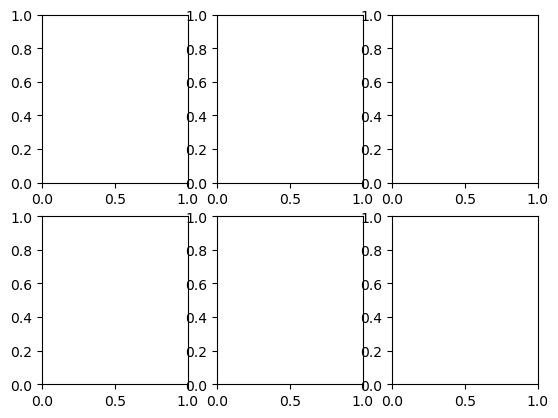

In [34]:
fig, axes = plt.subplots(2, 3)
print(type(axes))
print(axes.shape)

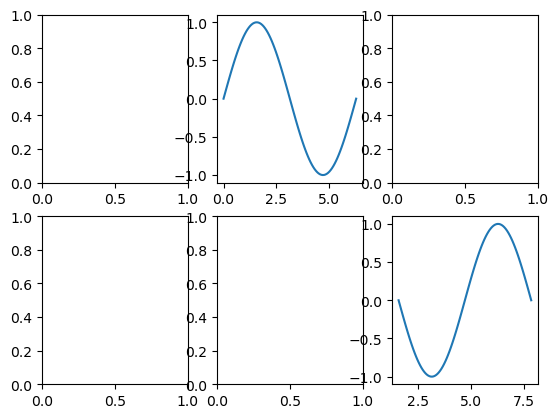

In [35]:
x_sin = np.linspace(0, 2*np.pi, 100)
x_cos = np.linspace(0.5*np.pi, 2.5*np.pi, 100)
y_sin = np.sin(x_sin)
y_cos = np.cos(x_cos)
fig, axes = plt.subplots(2, 3)
axes[0, 1].plot(x_sin, y_sin)
axes[1, 2].plot(x_cos, y_cos)
plt.show()

## A quick taste of other visualization libraries

## (Recap) Visualization Toolkits of Python

- "Wrangle"：[Pandas](https://pandas.pydata.org/docs/index.html)
- Visualize and communicate：
    - Static：[Matplotlib](https://matplotlib.org/)、[Seaborn](https://seaborn.pydata.org/)
    - Geovisualization：[Folium](https://python-visualization.github.io/folium/)
    - Interactive：[Plotly](https://plotly.com/)

## [Seaborn](https://seaborn.pydata.org/)

> Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

Source: <https://seaborn.pydata.org>

[[]]

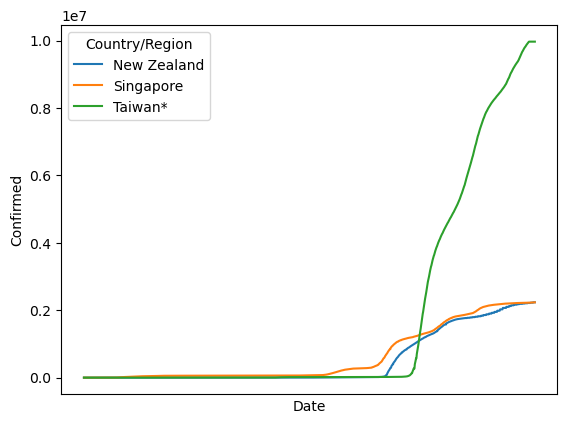

In [36]:
# Plotting with Seaborn
country_ts_data = confirmed_time_series[confirmed_time_series['Country/Region'].isin(['Taiwan*', 'Singapore', 'New Zealand'])]
fig = sns.lineplot(x="Date", y="Confirmed", hue="Country/Region", data=country_ts_data)
fig.set(xticks=[])

## [Folium](https://python-visualization.github.io/folium/)

> Folium builds on the data wrangling strengths of the Python ecosystem and the mapping strengths of the leaflet.js library. Manipulate your data in Python, then visualize it in on a Leaflet map via folium.

Source: <https://python-visualization.github.io/folium/>

In [37]:
confirmed_by_province_state = daily_report.groupby(["Province_State"])['Confirmed'].sum()
confirmed_by_province_state_df = pd.DataFrame(confirmed_by_province_state).reset_index()
confirmed_by_province_state_df

,Province_State,Confirmed
0,Abruzzo,650985
1,Acre,160386
2,Adygea Republic,54772
3,Aguascalientes,90634
4,Aichi,2094915
...,...,...
593,Zaporizhia Oblast,215070
594,Zeeland,180564
595,Zhejiang,11848
596,Zhytomyr Oblast,192801


In [38]:
# Plotting with Folium
url = "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
state_geo = f"{url}/us-states.json"
m = folium.Map(location=[48, -102], zoom_start=3)
folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=confirmed_by_province_state_df,
    columns=["Province_State", "Confirmed"],
    key_on="feature.properties.name",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Confirmed",
).add_to(m)
folium.LayerControl().add_to(m)

In [39]:
m

## [Plotly](https://plotly.com/)

> The plotly Python library is an interactive, open-source plotting library that supports over 40 unique chart types covering a wide range of statistical, financial, geographic, scientific, and 3-dimensional use-cases.

Source: <https://plotly.com/python/getting-started/>

In [ ]:
# Plotting with Plotly
fig = px.bar(pd.DataFrame(filtered_confirmed_by_country).reset_index().sort_values("Confirmed", ascending=False),
             x="Confirmed", y="Country_Region", color="Country_Region")
fig.show()

In [41]:
# Plotting with Plotly
country_ts_data = confirmed_time_series[confirmed_time_series['Country/Region'].isin(country_list)]
fig = px.line(country_ts_data, x="Date", y="Confirmed",
              color="Country/Region", line_group="Country/Region", hover_name="Country/Region",
              line_shape="spline", render_mode="svg")
fig.show()

In [42]:
# Plotting with Plotly
confirmed_by_lat_long = daily_report.groupby(['Combined_Key', "Lat", "Long_"])['Confirmed'].sum()
confirmed_by_lat_long_df = pd.DataFrame(confirmed_by_lat_long).reset_index()
fig = px.scatter_mapbox(confirmed_by_lat_long_df, lat="Lat", lon="Long_", size="Confirmed", color="Confirmed",
                        size_max=50, mapbox_style="carto-positron", zoom=0.5, hover_name="Combined_Key")
fig.show()